# Applying and Evaluating Agglomerative Clustering

In this hands-on tutorial, building and evaluating Agglomerative clustering is discussed. It is a  Agglomerative clustering  kind of hierarchical clustering technique where data points are grouped sharing similar characteristics. This technique starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram. Unlike K-means, this clustering technique do not depend upon parameter to form clustering. Using, dendrogram, user can identify best number of clusters for given data set.

The key steps to Agglomertive clustering are as follows:

1. Prepare data set

2. Use linkage function such as, single, average, ward  to group objects into hierarchical cluster tree, based on the distance information generated at step 1. Objects/clusters that are in close proximity are linked together using the linkage function.

3. Use dendrogram to determine where to cut the hierarchical tree into clusters. 

4. Apply Agglomertive clustering using information gathered in step 3

5. Evaluate clustering quality

Scikit learn library supports built in functionality for applying Agglomertive clustering, inspecting dendrogram and analysis of clustering output. In this tutorial, you will learn to use these functionalities to apply clustering on given data set. 

The data set used for demonstration is 2D. The two features are namely, income and expenditure. The information on these features is comprised from 200 customers showcasing there expenditure behaviour given their income. The idea is to apply clustering to identify similarity of expenditure behaviour of customers. 




# 1. Importing Libraries

In [ ]:
# pandas for data manipulation
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
% matplotlib inline

# importing  AgglomerativeClustering function from scikit learn
from sklearn.cluster import AgglomerativeClustering

# importing Dendrogram for inspecting merging of clusters
import scipy.cluster.hierarchy as shc

# importing StandardScaler from  scikit learn for data pre-processing
from sklearn.preprocessing import StandardScaler

# importing  silhouette_score metrices available in sklearn
from sklearn.metrics.cluster import silhouette_score


# 2. Loading Data set

In [ ]:
My_data = pd.read_csv('Data sets/Income_Expenditure.csv')
My_data.describe()

,Income,Expenditure
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


Both the features are in same scale hence pre-processing is not required.

# 3. Inspecting Dendrogram

Dendrogram helps to identify possible number of clusters for the given data set. It also explains how  data points are merged  to form a cluster. In order to identify number of cluster by looking at dendrogram is done by marking a horizontal line on the longest vertical distance without any horizontal interactions passing through it. 

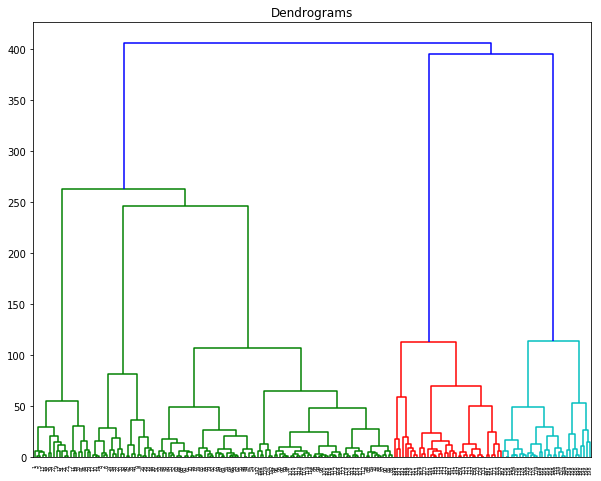

In [ ]:
plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")  

# linkage method can be single, average, max, min , ward depending upon choice of user
dend = shc.dendrogram(shc.linkage(My_data, method='ward'))
#plt.axhline(y=200, color='r', linestyle='--')
#plt.axhline(y=250, color='c', linestyle='--')
#plt.axhline(y=350, color='m', linestyle='--')

Three possible horizontal lines are marked. Each contributing to different cluatering output. As we go down(red line) in  choosing the horizontal line, number of clusters will increase and distance between cluaters will be low. On the other hand, as we go up(pink horizontal line), number of clusters wll be less but the intra-cluster distance will be high.  

# 4. Applying Agglomerative Clustering

Below, we first set number of clusters to 2 and apply agglomerative clustering. 

In [ ]:
# applying AgglomerativeClustering with number of clusters set to 2, distance matrix as euclidean
# and linkage method as Ward.
Cluster_result = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
Cluster_mapping = Cluster_result.fit_predict(My_data)
# prinitng assignments of clusters to data points present in the data set
Cluster_mapping

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

# 5. Printing Mapping of Data points per Cluster

In [ ]:
# making dataframe that details mapping of cluster with each data point present in the 
# data set
Mapping_customers = pd.DataFrame(
    {'Customer ID': list(range(0,200)),
     'Cluster_Mapping': Cluster_mapping,
     
    })
print("Cluster mapping of data points(top 10)\n")
print(Mapping_customers.head(10))
print("Number of data points per cluster\n")
print("----------------------------------")
print(Mapping_customers['Cluster_Mapping'].value_counts())

Cluster mapping of data points(top 10)

   Customer ID  Cluster_Mapping
0            0                0
1            1                0
2            2                0
3            3                0
4            4                0
5            5                0
6            6                0
7            7                0
8            8                0
9            9                0
Number of data points per cluster

----------------------------------
0    129
2     39
1     32
Name: Cluster_Mapping, dtype: int64


Cluster 1 has 129 instances whereas, cluster 0 has 71 data points. 

# 6. Visualizing Clusters

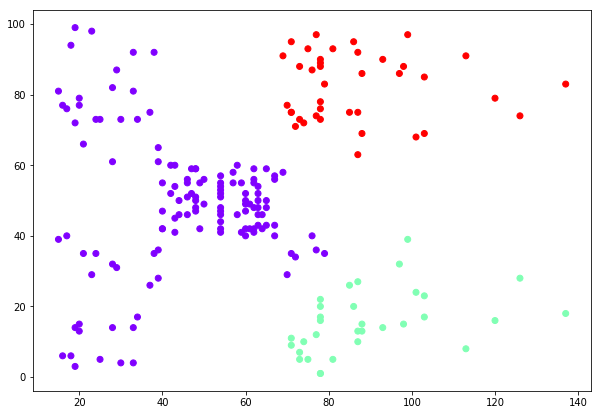

In [ ]:
plt.figure(figsize=(10, 7))
# making scatter point between two features based on clustering labels
plt.scatter(My_data['Income'], My_data['Expenditure'], c=Cluster_mapping, cmap='rainbow' )

Two clusters are identified 

# 7. Evaluating Clustering output using Silhouette Score

Silhouette score can be used to determine the degree of separation between clusters. The value of score ranges in interval [-1, 1]. The value close to 1 indicates good separation between clusters. On the other hand, a value close to 0 indicates that clusters are close to each other. The negative score represents wrong assignment of data points to the cluster.

In [ ]:
# Reapplying AgglomerativeClustering on the same data set with different values 
# of clustering value
for i in range(2, 7):
    Cluster_result = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward').fit_predict(My_data)
    # compute silhouette_score of each clustering output
    
    Cluster_score = silhouette_score(My_data,Cluster_result, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(i, Cluster_score))

For n_clusters = 2, silhouette score is 0.36706444723912895)
For n_clusters = 3, silhouette score is 0.4618340266628975)
For n_clusters = 4, silhouette score is 0.4916598193892782)
For n_clusters = 5, silhouette score is 0.5529945955148897)
For n_clusters = 6, silhouette score is 0.5380208285578872)


Based on Silhouette score, number of clusters when set to 5 gives good clustering output.